In [1]:
!pip install plotly

In [2]:
#Import libraries and dependencies 
import plotly
import warnings
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import statsmodels.api as sm
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler
from plotly.offline import plot,iplot,init_notebook_mode

In [3]:
#Loading data 
phy_desc=pd.read_csv('C:\\Users\\Okwua\\1-projects\\Phys_Descrip.txt')
cluster=pd.read_csv('C:\\Users\\Okwua\\1-projects\\Cluster_XYZ.csv', header=None)


In [4]:
#viewing the physical descriptors 
phy_desc.head()

N  infa_C_Au  infa_S_Mg  infa_S_O   cc  cs_Mg  cs_O  ave_GCN  csDist_Mg  \
0  1          1          1         0  0.0      1     0    1.972      2.855   
1  1          1          1         0  0.0      1     0    2.433      3.184   
2  1          1          1         0  0.0      1     0    2.895      3.542   
3  1          0          0         0  0.0      0     0    3.356      3.922   
4  1          0          0         0  0.0      0     0    3.817      4.317   

   csDist_O  Zdist   Ecoh   Eadh     Eb     Etot Config  
0    -0.556  1.167 -0.001  1.304  1.303 -367.335    1Au  
1    -0.095  1.167 -0.001 -0.663 -0.665 -369.303    1Au  
2     0.367  1.167 -0.001 -0.747 -0.748 -369.386    1Au  
3     0.828  0.000 -0.001 -0.563 -0.564 -369.202    1Au  
4     1.289  0.000 -0.001 -0.348 -0.350 -368.988    1Au

In [5]:
phy_desc.corr()

N  infa_C_Au  infa_S_Mg  infa_S_O        cc     cs_Mg  \
N          1.000000   0.559200   0.364535  0.334252  0.892341  0.504808   
infa_C_Au  0.559200   1.000000   0.922491  0.581302  0.532389  0.894619   
infa_S_Mg  0.364535   0.922491   1.000000  0.609248  0.369595  0.869175   
infa_S_O   0.334252   0.581302   0.609248  1.000000  0.311072  0.818600   
cc         0.892341   0.532389   0.369595  0.311072  1.000000  0.474962   
cs_Mg      0.504808   0.894619   0.869175  0.818600  0.474962  1.000000   
cs_O       0.404337   0.724062   0.722855  0.870087  0.375446  0.901092   
ave_GCN    0.050190  -0.562243  -0.683518 -0.435876 -0.005962 -0.563531   
csDist_Mg  0.039578  -0.565364  -0.694537 -0.457116 -0.022867 -0.575426   
csDist_O   0.044905  -0.570220  -0.698284 -0.457431 -0.012004 -0.579431   
Zdist      0.525101   0.855433   0.897356  0.776774  0.515549  0.919035   
Ecoh      -0.745608  -0.494266  -0.377179 -0.283043 -0.897971 -0.436395   
Eadh       0.248526   0.294581   0.260444  0.584027  0.210422  0.474234   
Eb        -0.357561  -0.114840  -0.008049  0.239194 -0.417159  0.050191   
Etot      -0.900476  -0.438522  -0.253902 -0.088698 -0.772526 -0.307606   

               cs_O   ave_GCN  csDist_Mg  csDist_O     Zdist      Ecoh  \
N          0.404337  0.050190   0.039578  0.044905  0.525101 -0.745608   
infa_C_Au  0.724062 -0.562243  -0.565364 -0.570220  0.855433 -0.494266   
infa_S_Mg  0.722855 -0.683518  -0.694537 -0.698284  0.897356 -0.377179   
infa_S_O   0.870087 -0.435876  -0.457116 -0.457431  0.776774 -0.283043   
cc         0.375446 -0.005962  -0.022867 -0.012004  0.515549 -0.897971   
cs_Mg      0.901092 -0.563531  -0.575426 -0.579431  0.919035 -0.436395   
cs_O       1.000000 -0.516150  -0.523993 -0.531696  0.834078 -0.350009   
ave_GCN   -0.516150  1.000000   0.984081  0.996013 -0.630369  0.062661   
csDist_Mg -0.523993  0.984081   1.000000  0.994982 -0.653966  0.078494   
csDist_O  -0.531696  0.996013   0.994982  1.000000 -0.652799  0.067511   
Zdist      0.834078 -0.630369  -0.653966 -0.652799  1.000000 -0.447637   
Ecoh      -0.350009  0.062661   0.078494  0.067511 -0.447637  1.000000   
Eadh       0.542687 -0.177325  -0.170033 -0.180936  0.407430 -0.133100   
Eb         0.172329 -0.155353  -0.127306 -0.151069  0.043203  0.525195   
Etot      -0.177425 -0.118574  -0.105563 -0.114818 -0.353556  0.660925   

               Eadh        Eb      Etot  
N          0.248526 -0.357561 -0.900476  
infa_C_Au  0.294581 -0.114840 -0.438522  
infa_S_Mg  0.260444 -0.008049 -0.253902  
infa_S_O   0.584027  0.239194 -0.088698  
cc         0.210422 -0.417159 -0.772526  
cs_Mg      0.474234  0.050191 -0.307606  
cs_O       0.542687  0.172329 -0.177425  
ave_GCN   -0.177325 -0.155353 -0.118574  
csDist_Mg -0.170033 -0.127306 -0.105563  
csDist_O  -0.180936 -0.151069 -0.114818  
Zdist      0.407430  0.043203 -0.353556  
Ecoh      -0.133100  0.525195  0.660925  
Eadh       1.000000  0.634792  0.184900  
Eb         0.634792  1.000000  0.634870  
Etot       0.184900  0.634870  1.000000

In [6]:
#viewing cluster dataset
cluster.head()

0    1         2   3   4   5   6   7   8   9   ...  62  63  64  65  66  \
0  0.0  0.0   8.30346 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
1  0.0  0.0   8.76476 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
2  0.0  0.0   9.22606 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
3  0.0  0.0   9.68736 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   
4  0.0  0.0  10.14867 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN   

   67  68  69  70  71  
0 NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN  
2 NaN NaN NaN NaN NaN  
3 NaN NaN NaN NaN NaN  
4 NaN NaN NaN NaN NaN  

[5 rows x 72 columns]

### Basic Inquiry about the dataset 

In [7]:
#print shape of physical descriptors dataset 
dim_phyD=phy_desc.shape
dim_phyD

(1839, 16)

In [8]:
#print shape of cluster dataset 
dim_cluster=cluster.shape
dim_cluster

(1839, 72)

In [9]:
# Exploring basic data info
print('The number of unique values in each variable')
print(phy_desc.nunique())
print('')
print('The sum of null values in each attribute')
print(phy_desc.isna().sum())
print('')
print('information about each column')
print(phy_desc.info())

The number of unique values in each variable
N               9
infa_C_Au      12
infa_S_Mg       9
infa_S_O        9
cc             13
cs_Mg          33
cs_O           20
ave_GCN      1171
csDist_Mg    1192
csDist_O       42
Zdist         353
Ecoh           19
Eadh         1435
Eb           1069
Etot         1555
Config         20
dtype: int64

The sum of null values in each attribute
N            0
infa_C_Au    0
infa_S_Mg    0
infa_S_O     0
cc           0
cs_Mg        0
cs_O         0
ave_GCN      0
csDist_Mg    0
csDist_O     0
Zdist        0
Ecoh         0
Eadh         0
Eb           0
Etot         0
Config       0
dtype: int64

information about each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          1839 non-null   int64  
 1   infa_C_Au  1839 non-null   int64  
 2   infa_S_Mg  1839 non-null   int64  
 3   infa_S_O   1839 

In [10]:
#number of observations for each level of N 
phy_desc['N'].value_counts(sort=False)

1     104
2     104
3     105
4     555
5     515
6     210
9     178
12     12
24     56
Name: N, dtype: int64

In [11]:
#unique configurations in the dataset 
phy_desc.Config.unique()

array(['1Au', '2Au', '3Au', '4Au_a', '4Au_b', '4Au_c', '4Au_d', '4Au_e',
       '4Au_f', '5Au_a', '5Au_b', '5Au_c', '5Au_d', '5Au_e', '6Au_a',
       '6Au_b', '9Au_a', '9Au_b', '12Au_a', '24Au_a'], dtype=object)

In [12]:
#number of unique configurations in the data set 
phy_desc.Config.nunique()

20

In [13]:
phy_desc.groupby('N').mean()

infa_C_Au  infa_S_Mg  infa_S_O        cc      cs_Mg      cs_O   ave_GCN  \
N                                                                             
1    0.567308   1.019231  0.153846  0.000000   0.923077  0.375000  3.124000   
2    0.557692   0.980769  0.144231  1.000000   0.884615  0.365385  4.351644   
3    0.561905   1.009524  0.152381  2.000000   0.914286  0.371429  4.463162   
4    2.227027   2.920721  0.609009  2.464865   3.544144  1.636036  3.261411   
5    1.613592   1.992233  0.366990  3.120000   2.427184  1.046602  3.995348   
6    3.466667   3.700000  0.966667  3.166500   5.480952  2.595238  3.142343   
9    5.308989   4.651685  1.483146  4.370972   8.500000  3.932584  3.123556   
12   9.000000   6.666667  3.333333  6.000000  15.833333  6.583333  2.939333   
24   9.178571   6.428571  2.875000  7.250000  15.446429  7.357143  4.385786   

    csDist_Mg  csDist_O     Zdist      Ecoh      Eadh        Eb        Etot  
N                                                                            
1    3.138058  0.357731  1.266087 -0.001000 -0.550625 -0.551856 -369.189962  
2    4.358077  1.646269  0.738096 -1.149000 -0.696212 -1.497048 -371.632202  
3    4.419962  1.750000  0.815743 -1.200000 -0.848267 -1.482705 -373.086248  
4    3.240378  0.492566  2.099923 -1.546124 -0.493099 -1.669510 -375.316142  
5    3.958437  1.265097  1.731899 -1.662033  0.787155 -1.504621 -376.161171  
6    3.111633  0.366600  2.602681 -2.062500 -0.812129 -2.197733 -381.824581  
9    3.079180  0.340685  3.621663 -2.326360  1.396236 -2.171287 -388.179702  
12   2.892583  0.136083  5.974583 -2.451000  4.370500 -2.086583 -393.675917  
24   4.332911  1.652839  6.103750 -2.849000  6.331804 -2.585714 -430.692321

In [14]:
#Quick statistical summary of the physical descriptors 
phy_desc.describe()

N    infa_C_Au    infa_S_Mg     infa_S_O           cc  \
count  1839.000000  1839.000000  1839.000000  1839.000000  1839.000000   
mean      5.313757     2.467645     2.722132     0.675367     2.832952   
std       3.850862     2.991994     2.850750     1.576348     1.307889   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.000000     0.000000     0.000000     0.000000     2.500000   
50%       5.000000     1.000000     2.000000     0.000000     3.000000   
75%       5.000000     4.000000     5.000000     0.000000     3.200000   
max      24.000000    12.000000     8.000000     8.000000     7.250000   

             cs_Mg         cs_O      ave_GCN    csDist_Mg     csDist_O  \
count  1839.000000  1839.000000  1839.000000  1839.000000  1839.000000   
mean      3.926047     1.793910     3.594642     3.566933     0.842243   
std       5.565025     3.296789     0.896549     0.889375     0.944847   
min       0.000000     0.000000     1.972000     1.920000    -0.556000   
25%       0.000000     0.000000     2.812000     2.827000    -0.095000   
50%       1.000000     0.000000     3.563000     3.529000     0.828000   
75%       6.000000     2.000000     4.072500     4.062000     1.289000   
max      34.000000    20.000000     5.820000     5.770000     3.044000   

             Zdist         Ecoh         Eadh           Eb         Etot  
count  1839.000000  1839.000000  1839.000000  1839.000000  1839.000000  
mean      2.151276    -1.629048     0.216414    -1.679217  -378.665064  
std       1.825972     0.552884     4.946418     0.802302    11.488562  
min       0.000000    -2.849000    -7.277000    -3.153000  -444.301000  
25%       0.833000    -1.854000    -2.184000    -2.250000  -380.017000  
50%       1.450000    -1.562000    -1.116000    -1.834000  -376.799000  
75%       3.231000    -1.512000    -0.323500    -1.284000  -372.746500  
max       9.361000    -0.001000    50.725000     1.972000  -350.889000

Skewness: -3.555874
Kurtosis: 16.075519


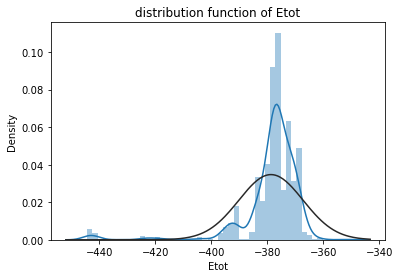

In [15]:
#probability distribution function of the target variabe total energy~ Etot 
plt.title('distribution function of Etot');
from scipy.stats import norm 
sns.distplot(phy_desc['Etot'], fit=norm);


##skewness and kurtosis 
print('Skewness: %f' % phy_desc['Etot'].skew())
print('Kurtosis: %f' % phy_desc['Etot'].kurt())

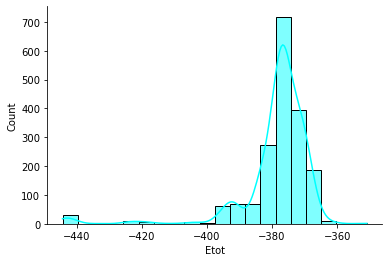

In [16]:
sns.histplot(x='Etot', data=phy_desc,
            kde=True, bins=20, color='cyan')
sns.despine();

Skewness: -3.555874
Kurtosis: 16.075519
mean: -378.665064
Standrad deviation: 11.488562


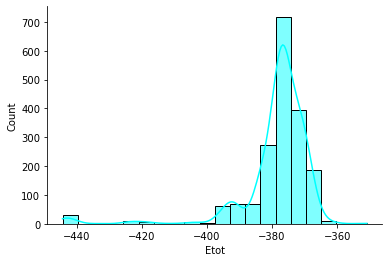

<Figure size 720x432 with 0 Axes>

In [17]:
sns.histplot(x='Etot', data=phy_desc,
            kde=True, bins=20, color='cyan')
sns.despine();
print('Skewness: %f' % phy_desc['Etot'].skew())
print('Kurtosis: %f' % phy_desc['Etot'].kurt())
print('mean: %f' % phy_desc['Etot'].mean())
print('Standrad deviation: %f' % phy_desc['Etot'].std())
plt.figure(figsize=(10,6));

In [18]:
range1= max(phy_desc.Etot)-min(phy_desc.Etot)
print(range1)
print( max(phy_desc.Etot))
print(min(phy_desc.Etot))

93.41199999999998
-350.889
-444.301


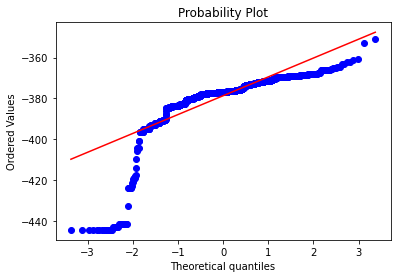

In [19]:
from scipy import stats
res=stats.probplot(phy_desc['Etot'], plot=plt);

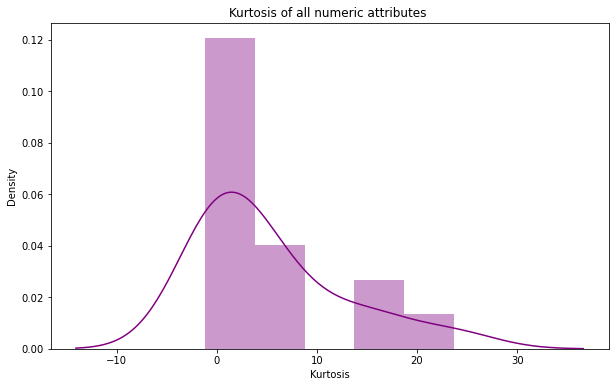

In [65]:
col_names=phy_desc.columns
plt.figure(figsize=(10,6))
plt.title('Kurtosis of all numeric attributes ');
sns.distplot(phy_desc[col_names].kurt(), color='purple', axlabel='Kurtosis', );

In [21]:
PhyD_Names = ['N', 'infa_C_Au', 'infa_S_Mg', 'infa_S_O', 'cc', 'cs_Mg', 'cs_O',

             'ave_GCN', 'csDist_Mg', 'csDist_O', 'Zdist', 'Ecoh', 'Eadh', 'Eb', 'Etot']

PhyD = np.loadtxt('C:\\Users\\Okwua\\1-projects\\Raw_Phys_Descrip.txt', delimiter=',', dtype=float)

   

Config = np.concatenate((np.repeat('1Au',104), np.repeat('2Au',104), np.repeat('3Au',105),

                         np.repeat('4Au_a',102), np.repeat('4Au_b',45), np.repeat('4Au_c',103),

                         np.repeat('4Au_d',104), np.repeat('4Au_e',105), np.repeat('4Au_f',96),

                         np.repeat('5Au_a',103), np.repeat('5Au_b',103), np.repeat('5Au_c',103),

                         np.repeat('5Au_d',104), np.repeat('5AU_e',102),

                         np.repeat('6Au_a',105), np.repeat('6Au_b',105),

                         np.repeat('9Au_a',99), np.repeat('9Au_b',79),

                         np.repeat('12Au_a',12),

                         np.repeat('24Au_b',56)))

 

Cl_XYZ = pd.DataFrame.to_numpy( pd.read_csv('C:\\Users\\Okwua\\1-projects\\Cluster_XYZ.csv', header=None, names=range(3*24)) )

 

Nobs = PhyD.shape[0]



In [22]:
entry_nb = 1832

N_atom = int(PhyD[entry_nb,0])

Mat_XYZ = (Cl_XYZ[entry_nb, :(3*N_atom)]).reshape((N_atom, 3))
matrix = pd.DataFrame(data=Mat_XYZ, columns=["X", "Y", "Z"])

print('Entry number %s\n' % (entry_nb))

for i in range(15):

    print('%s = %s' % (PhyD_Names[i], PhyD[entry_nb,i]))

print('Config = %s' % Config[entry_nb])

print('\n')

print('Atomic coordinates (rows are the coordinates of each atom):\n')

#print(Mat_XYZ)

print(matrix)



Entry number 1832

N = 24.0
infa_C_Au = 12.0
infa_S_Mg = 8.0
infa_S_O = 0.0
cc = 7.25
cs_Mg = 8.0
cs_O = 0.0
ave_GCN = 4.667
csDist_Mg = 4.608
csDist_O = 1.949
Zdist = 5.476
Ecoh = -2.849
Eadh = -7.266
Eb = -3.152
Etot = -444.29
Config = 24Au_b


Atomic coordinates (rows are the coordinates of each atom):

          X        Y         Z
0   2.11303  1.26782   9.22606
1   4.94339  1.28388   9.22606
2   7.77832  1.28269   9.22606
3   6.35000  3.38491   9.22606
4   3.52707  3.38693   9.22606
5   0.72790  3.39437   9.22606
6   2.12461  5.51095   9.22606
7   4.93959  5.49498   9.22606
8   7.76108  5.49371   9.22606
9   6.34881  7.61511   9.22606
10  3.54753  7.61857   9.22606
11  0.69350  7.60488   9.22606
12  3.86034  1.03522  12.07562
13  6.62613  0.71497  11.82264
14  0.74117  1.43973  13.43887
15  7.72583  3.22516  12.01123
16  5.02884  3.46148  12.12323
17  2.21767  3.23522  12.02322
18  3.49149  5.78827  12.01676
19  6.39834  5.85064  11.85512
20  0.68437  5.48813  12.22619
21  7.8396

In [23]:
import plotly.express as px
fig = px.scatter_3d(matrix, x='X', y='Y', z='Z',
              color='X')
fig.show()

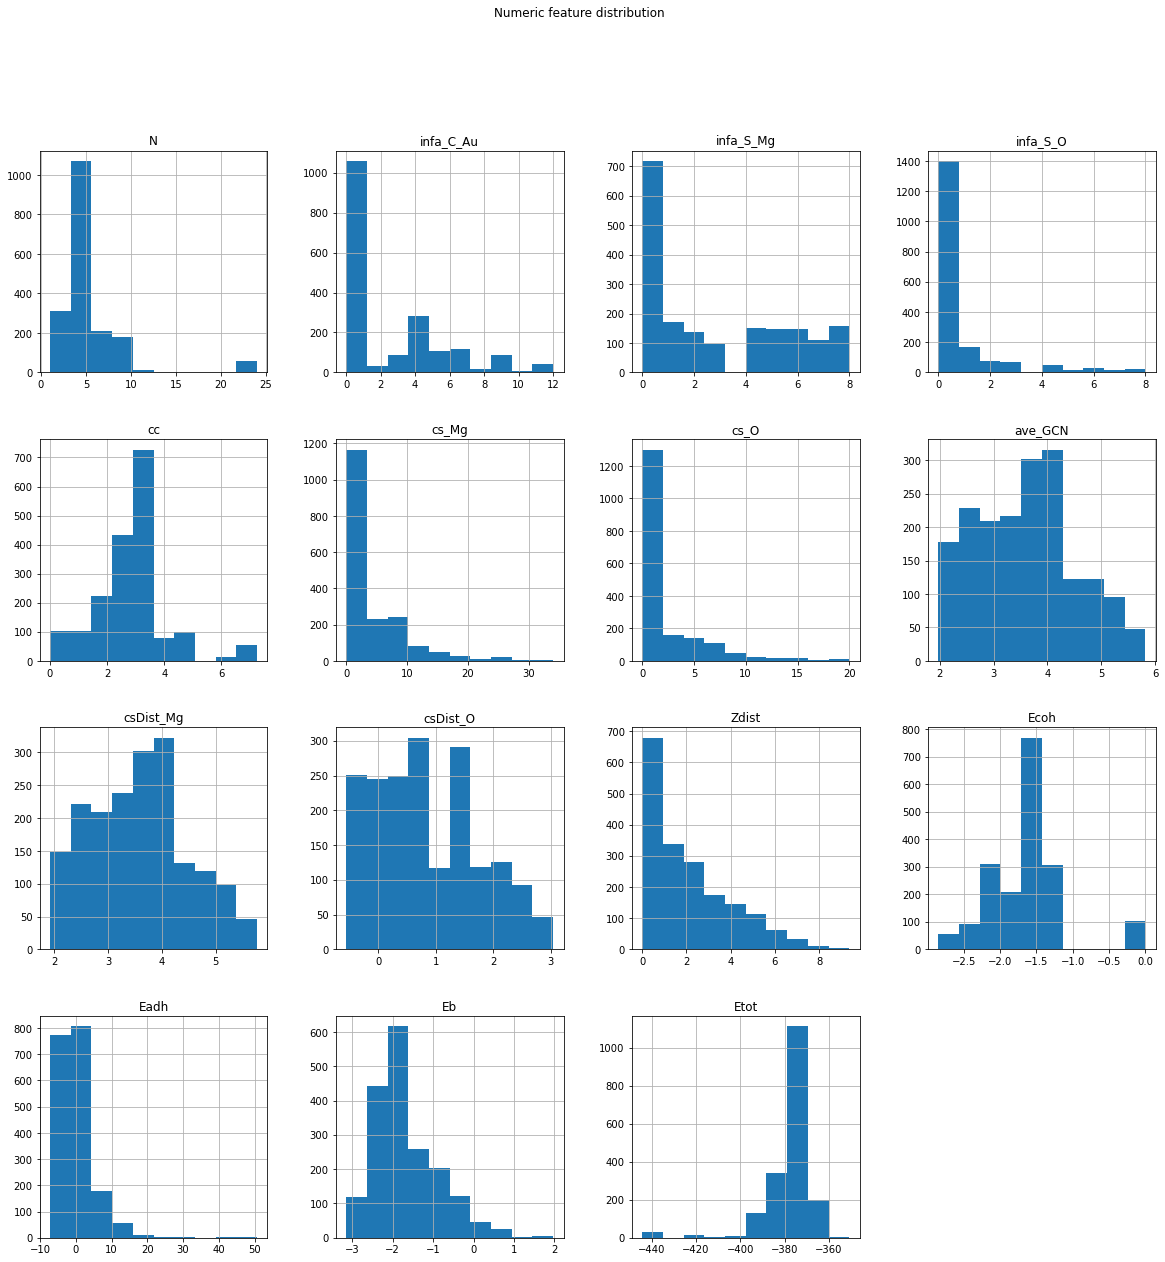

In [24]:
phy_desc.hist(figsize=(20,20));
plt.suptitle('Numeric feature distribution')
plt.show()

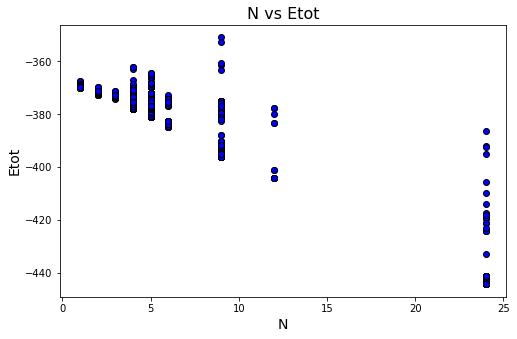

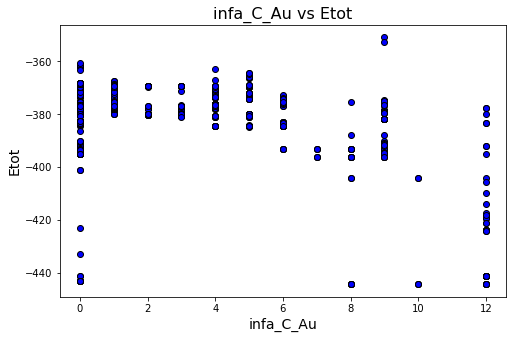

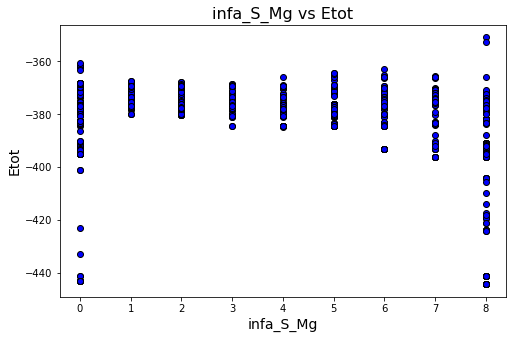

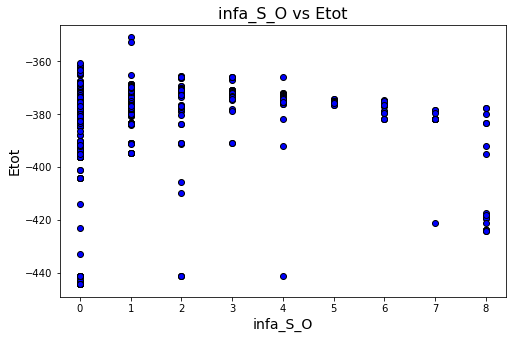

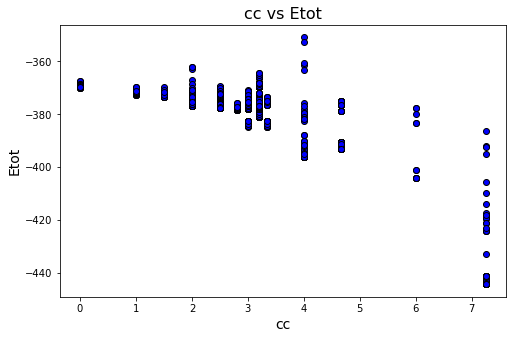

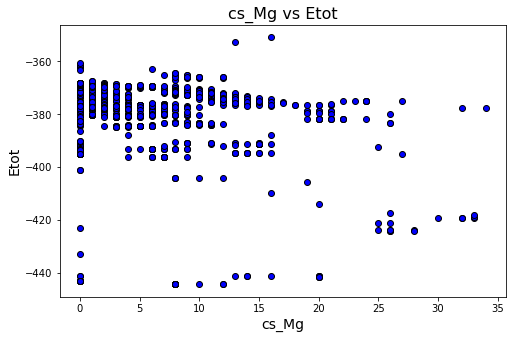

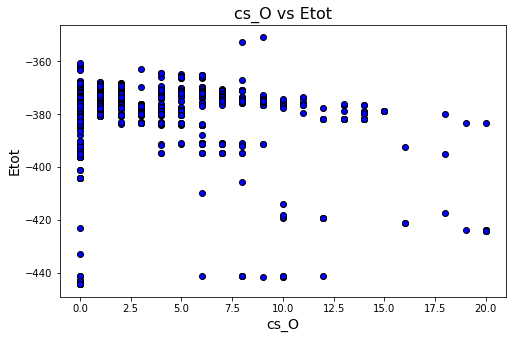

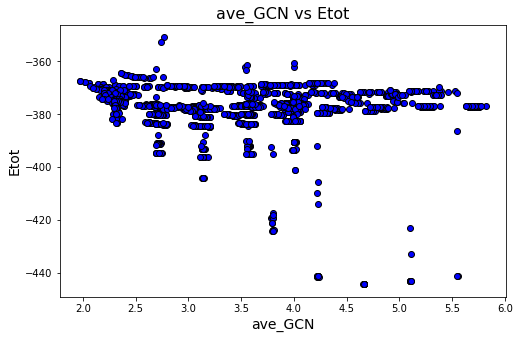

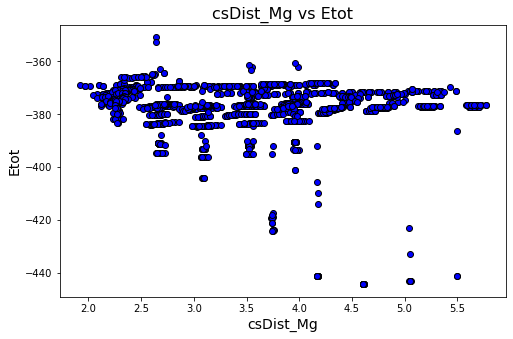

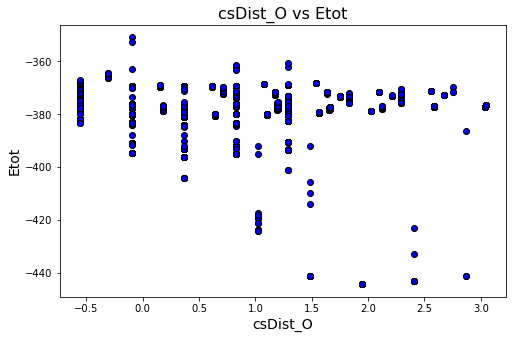

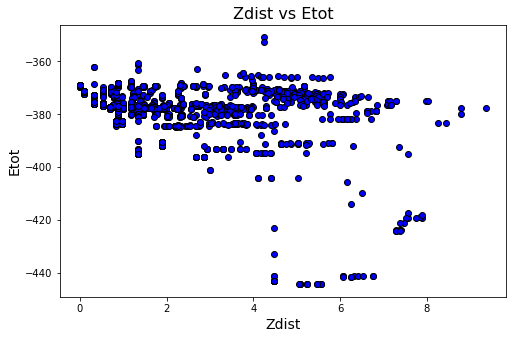

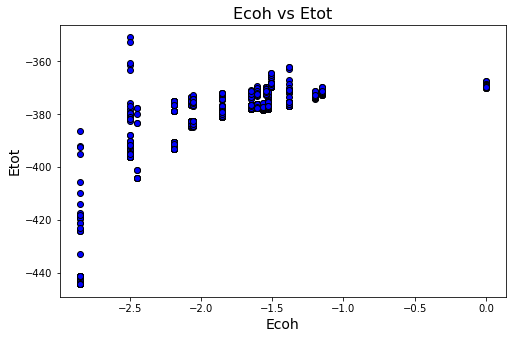

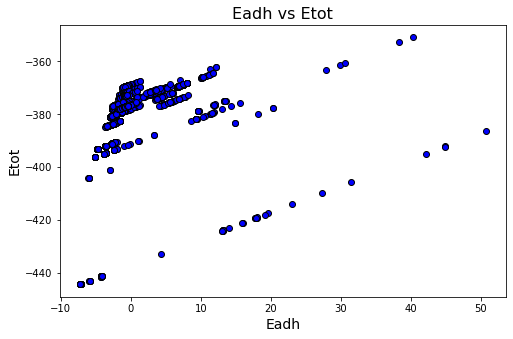

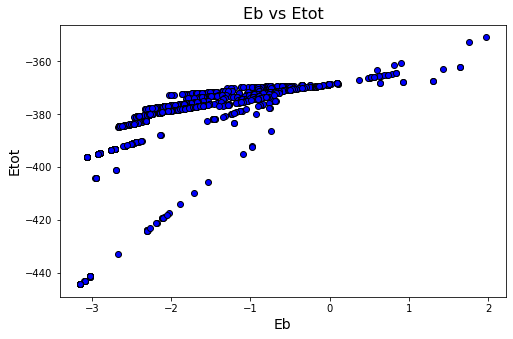

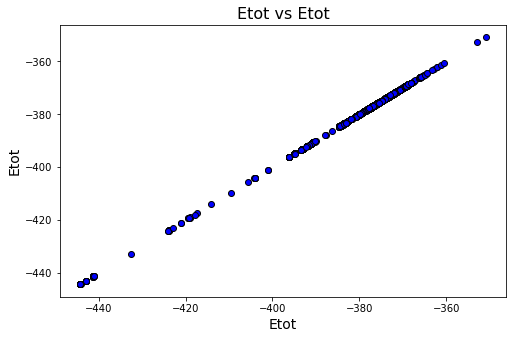

In [25]:
for c in phy_desc.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs Etot".format(c),fontsize=16)
    plt.scatter(x=phy_desc[c], y=phy_desc['Etot'], color='blue', edgecolor='k')
    plt.grid(False)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Etot',fontsize=14)
    plt.show()

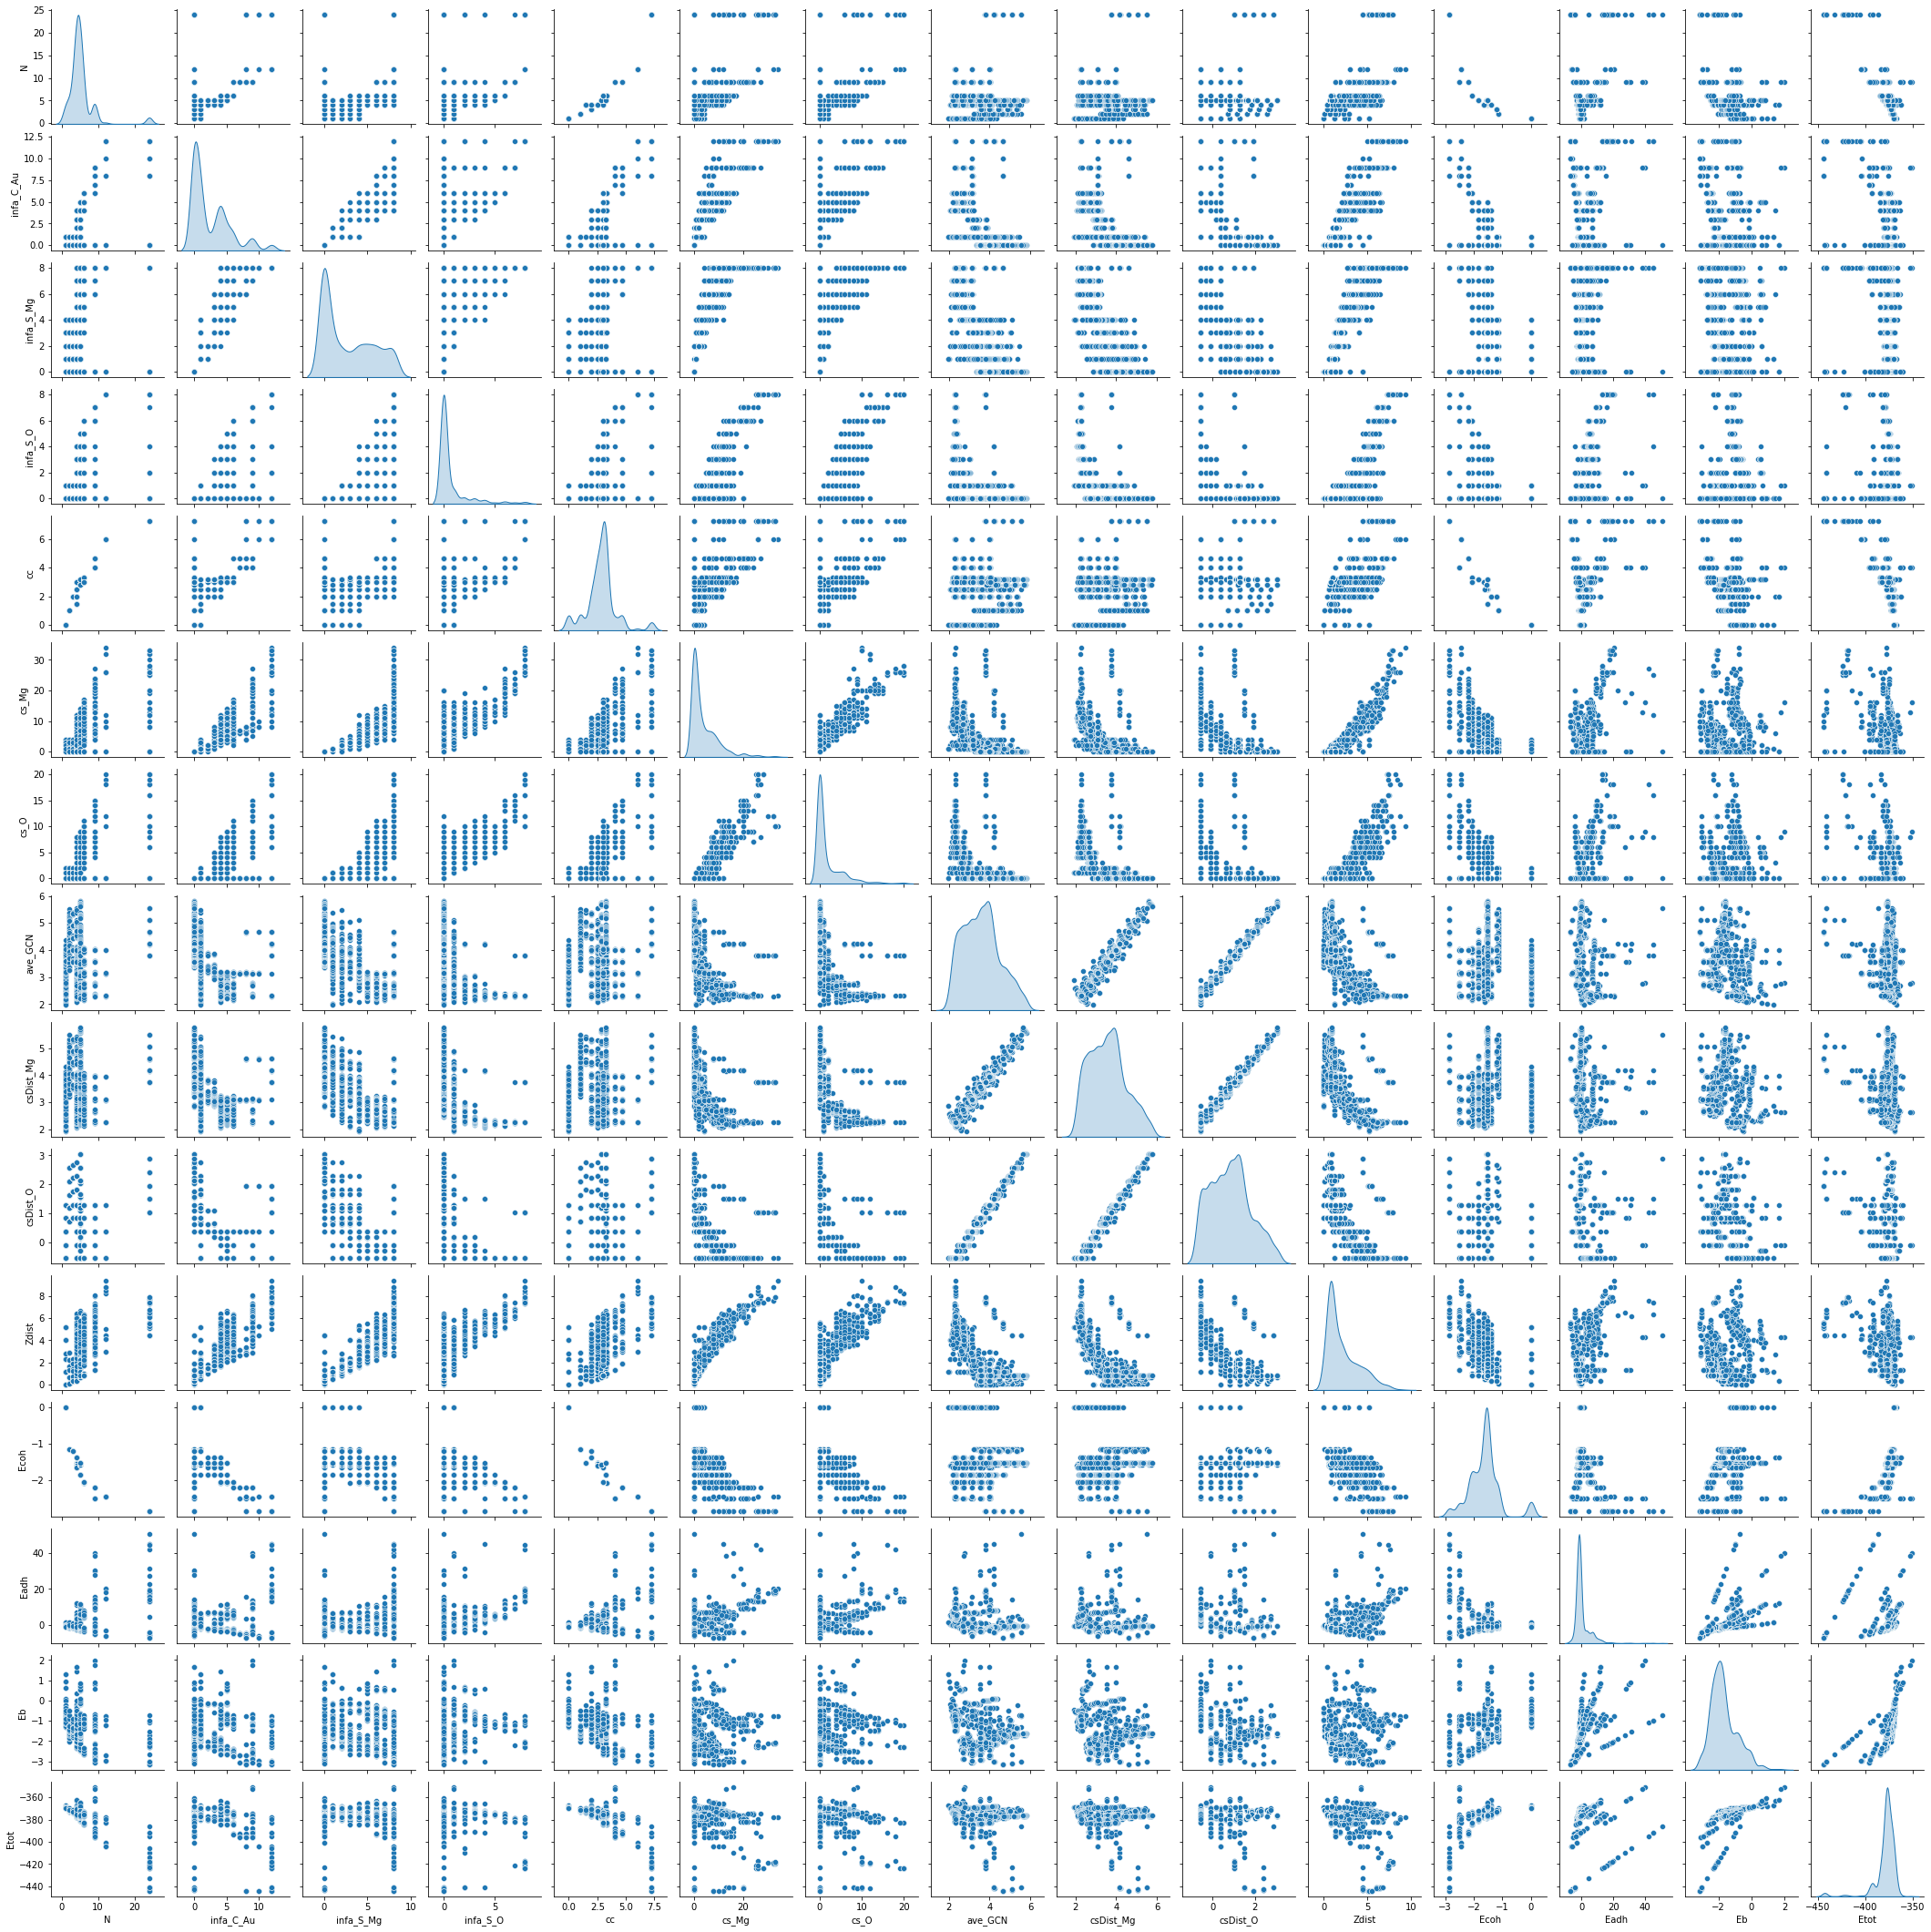

In [26]:
col_names=['N', 'infa_C_Au', 'infa_S_Mg', 'infa_S_O', 'cc', 'cs_Mg', 'cs_O',
       'ave_GCN', 'csDist_Mg', 'csDist_O', 'Zdist', 'Ecoh', 'Eadh', 'Eb',
       'Etot']
sns.pairplot(phy_desc[col_names], height =2, kind='scatter', diag_kind='kde');

## Corellation Analysis 

In [27]:
#comapre corellation of predictor variables with price 

#check correlation 
print('Correlation analysis of independent variables with Etot~target')
correlation=phy_desc.corr()
correlation['Etot']

Correlation analysis of independent variables with Etot~target


N           -0.900476
infa_C_Au   -0.438522
infa_S_Mg   -0.253902
infa_S_O    -0.088698
cc          -0.772526
cs_Mg       -0.307606
cs_O        -0.177425
ave_GCN     -0.118574
csDist_Mg   -0.105563
csDist_O    -0.114818
Zdist       -0.353556
Ecoh         0.660925
Eadh         0.184900
Eb           0.634870
Etot         1.000000
Name: Etot, dtype: float64

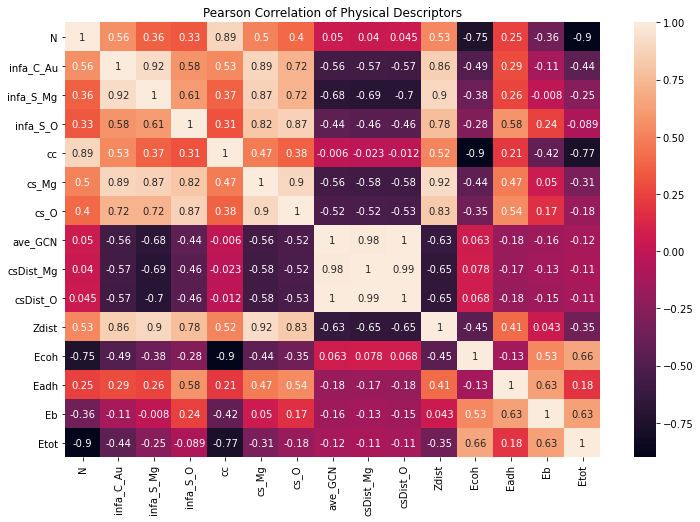

In [28]:
#correlation matrix for physical descriptors 
corrMatrix = phy_desc.corr()
fig, ax = plt.subplots(figsize=(12,8))  
ax=sns.heatmap(corrMatrix,annot=True,linecolor='white')
ax.set_title('Pearson Correlation of Physical Descriptors');
plt.show()

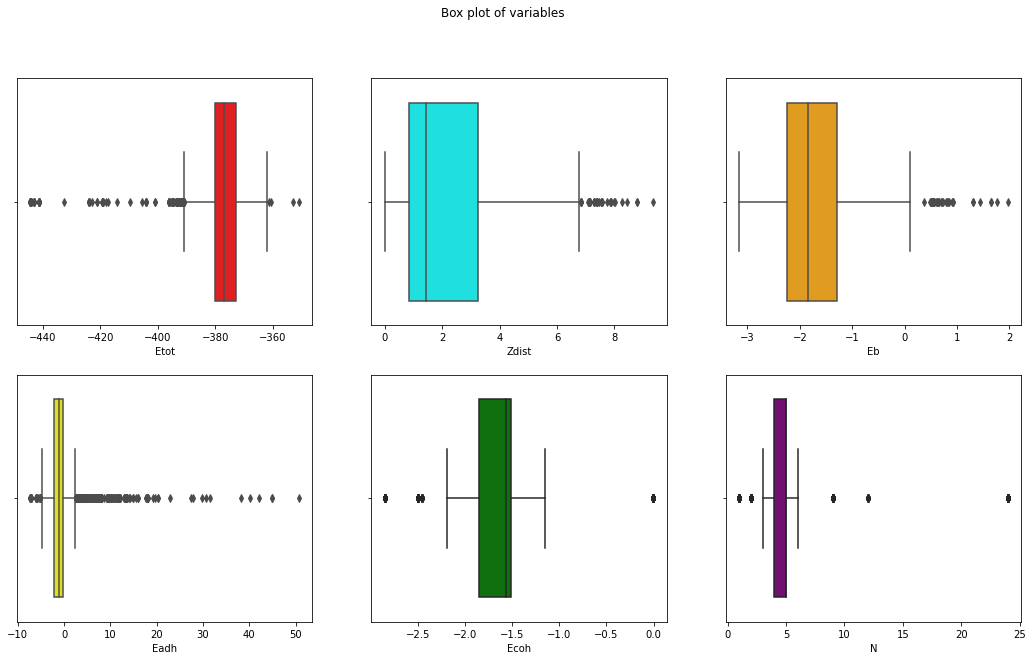

In [29]:
# checking outliers 
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Box plot of variables')

sns.boxplot(ax=axes[0, 0], data=phy_desc, x='Etot',color='red')
sns.boxplot(ax=axes[0, 1], data=phy_desc, x='Zdist',color='cyan')
sns.boxplot(ax=axes[0, 2], data=phy_desc, x='Eb',color='orange')
sns.boxplot(ax=axes[1, 0], data=phy_desc, x='Eadh',color='yellow')
sns.boxplot(ax=axes[1, 1], data=phy_desc, x='Ecoh',color='green')
sns.boxplot(ax=axes[1, 2], data=phy_desc, x='N',color='purple');

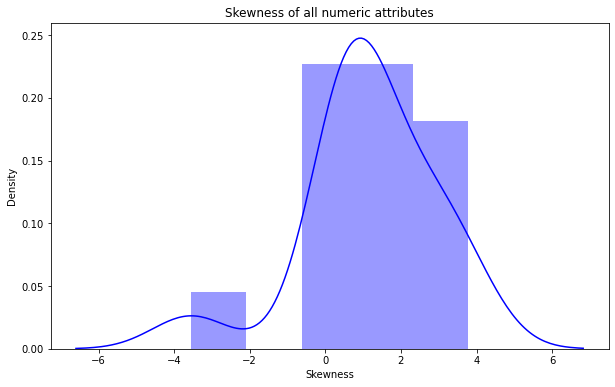

In [30]:
#Skewness of all numeric attributes 
plt.figure(figsize=(10,6))
plt.title('Skewness of all numeric attributes');
sns.distplot(phy_desc[col_names].skew(), color='blue', axlabel='Skewness', );

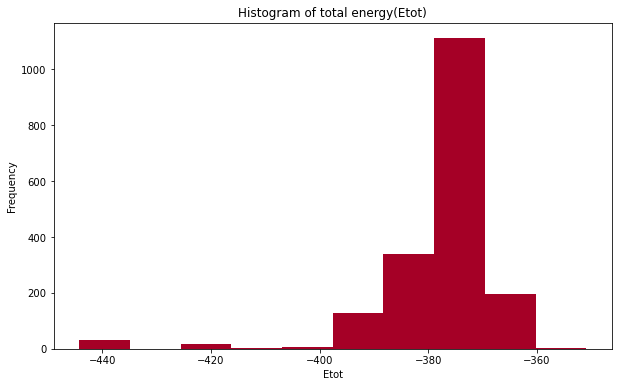

In [31]:
# Histogram of Etot
plt.figure(figsize=(10,6))
ax=phy_desc['Etot'].plot(kind='hist',colormap='RdYlBu')
plt.title('Histogram of total energy(Etot)');
plt.xlabel('Etot');

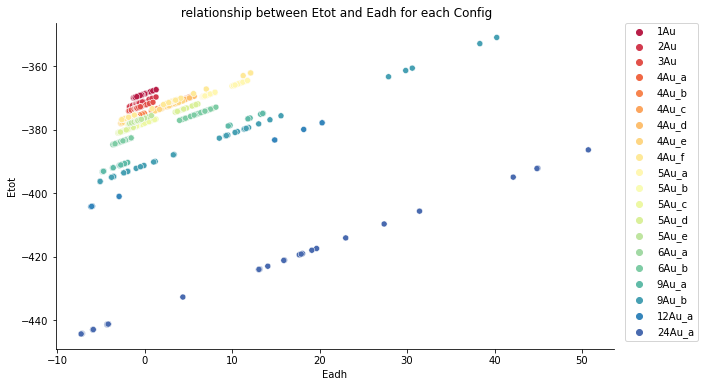

In [32]:
#relationship between Etot and Eadh for each Config
plt.figure(figsize=(10,6))                         
ax=sns.scatterplot(data=phy_desc, x="Eadh", 
                   y="Etot",hue="Config"
                   ,palette='Spectral') 
ax.set_title(' relationship between Etot and Eadh for each Config')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
sns.despine();

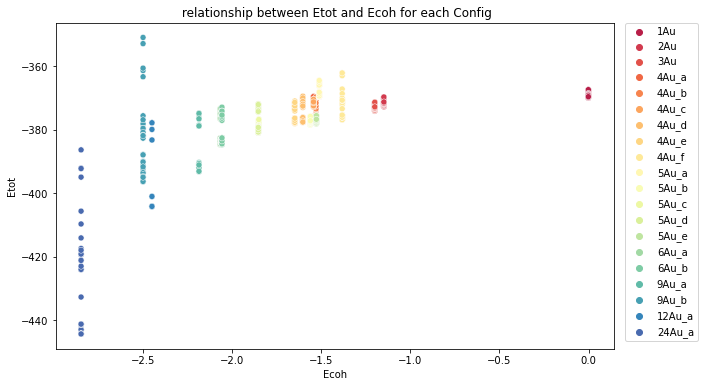

In [33]:
#Linear relation between Etot and Ecoh for each Config
plt.figure(figsize=(10,6))                         
ax=sns.scatterplot(data=phy_desc, x="Ecoh", 
                   y="Etot",hue="Config"
                   ,palette='Spectral', ) 
ax.set_title(' relationship between Etot and Ecoh for each Config')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

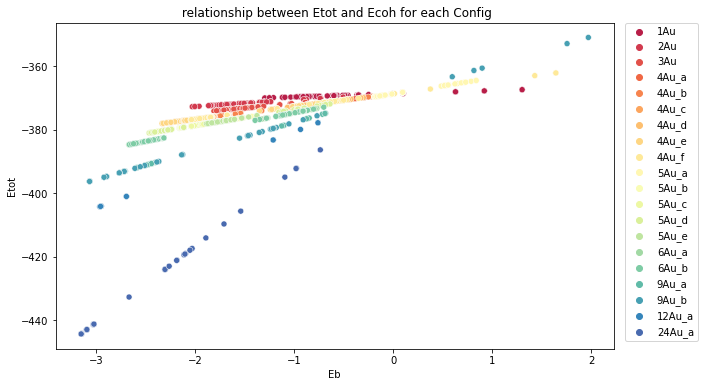

In [66]:
#Linear relation between Etot and Ecoh for each Config
plt.figure(figsize=(10,6))                         
ax=sns.scatterplot(data=phy_desc, x="Eb", 
                   y="Etot",hue="Config"
                   ,palette='Spectral', ) 
ax.set_title(' relationship between Etot and Ecoh for each Config')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

### Descriptive statistics

In [35]:
## linear regression for predicting minimum Etot for given N 
min_energy_per_atom=phy_desc.groupby(['N'])['Etot'].min()
df_min_Etot = pd.DataFrame(min_energy_per_atom, columns = ['Etot'])
df_min_Etot.reset_index(inplace=True)
df_min_Etot.rename(columns = {'Etot' : 'Min Etot'}, inplace = True)
df_min_Etot

N  Min Etot
0   1  -369.935
1   2  -372.697
2   3  -374.070
3   4  -377.978
4   5  -380.963
5   6  -384.657
6   9  -396.242
7  12  -404.209
8  24  -444.301

In [36]:
#covert to lists 
N_list=df_min_Etot['N'].tolist()
Etot_list=df_min_Etot['Min Etot'].tolist()


#covert to numpy lists
N_np=np.array(N_list,dtype=np.float64)
Etot_np=np.array(Etot_list,dtype=np.float64)

# define best fit line 
def best_fit_line(N_np,Etot_np):
    slope=(((mean(N_np)*mean(Etot_np))-mean(N_np*Etot_np))/((mean(N_np)*mean(N_np))-mean(N_np*N_np)))
    y_intercept=mean(Etot_np)-slope*mean(N_np)
    return slope, y_intercept

# calculate the slope and y-intercept of the lists 
slope, y_intercept=best_fit_line(N_np,Etot_np)


#get regression line from the calcuated slope and y-intercept
regression_line=[(slope * x)+ y_intercept for x in N_np]

#make predictions of Minimal enegry for unknown number of atoms 
N_unknown=15
Etot_N_unknown=(slope *N_unknown) + y_intercept


The minimum Etot for N=15 is-414.5999580610022


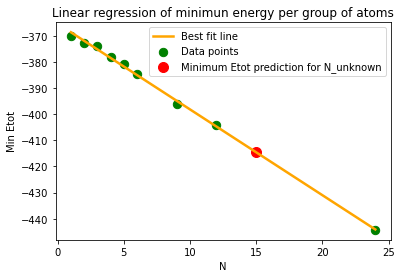

In [64]:
#from matplotlib import style
#style.use('seaborn')
plt.scatter(N_np, Etot_np, label='Data points', alpha=1.0, color='green',s=70)
plt.scatter(N_unknown,Etot_N_unknown, label='Minimum Etot prediction for N_unknown', color='red',s=100)
plt.plot(N_np,regression_line,label='Best fit line',color='orange',linewidth=2.5)
plt.title('Linear regression of minimun energy per group of atoms')
plt.xlabel('N')
plt.ylabel('Min Etot')
plt.legend();


#get regression line from the calcuated slope and y-intercept 
print(f"The minimum Etot for N=15 is{Etot_N_unknown}")


There is a linear relationship between Minimum total energy across each number of atoms as shown in the graph above,the Minimum total energy decrease as N increases. We can therefore use the line of best fit to predict the minimum energy for an Unkwown number of atoms. On doing so, we discover that for N=15, the total energy is -414.5999580610022 

### Sensitivity analysis

In [38]:
data_PhyD=pd.read_csv('C:\\Users\\Okwua\\1-projects\\Phys_Descrip.txt')
data_PhyD.drop(['Config','Ecoh','Eb','Eadh'], axis=1,inplace=True)

In [39]:
data_PhyD.shape

(1839, 12)

In [40]:
X=data_PhyD.iloc[:,:-1] ## independent features
y=data_PhyD.iloc[:,-1]

In [41]:
n = 20 # specify percentage 

#separate low and high Etot values for N=1
N_1=pd.DataFrame(data_PhyD.loc[data_PhyD['N'] == 1]).sort_values("Etot") 
N1_Low=N_1.head(int(len(N_1)*(n/100)))
N1_Low.reset_index(drop=True, inplace=True)
c1 = N_1.merge(N1_Low, on=["Etot"])
N1_High = N_1[~N_1.Etot.isin(c1.Etot)]
N1_High.reset_index(drop=True, inplace=True)

#separate low and high Etot values for N=2
N_2=pd.DataFrame(data_PhyD.loc[data_PhyD['N'] == 2]).sort_values('Etot')
N2_Low=N_2.head(int(len(N_2)*(n/100)))
N2_Low.reset_index(drop=True, inplace=True)
c2 = N_2.merge(N2_Low, on=["Etot"])
N2_High = N_2[~N_2.Etot.isin(c2.Etot)]
N2_High.reset_index(drop=True, inplace=True)

#separate low and high Etot values for N=3
N_3=pd.DataFrame(data_PhyD.loc[data_PhyD['N'] == 3]) .sort_values('Etot')
N3_Low=N_3.head(int(len(N_3)*(n/100)))
N3_Low.reset_index(drop=True, inplace=True)
c3 = N_3.merge(N3_Low, on=["Etot"])
N3_High = N_3[~N_3.Etot.isin(c3.Etot)]
N3_High.reset_index(drop=True, inplace=True)

#separate low and high Etot values for N=4
N_4=pd.DataFrame(data_PhyD.loc[data_PhyD['N'] == 4]).sort_values('Etot')
N4_Low=N_4.head(int(len(N_4)*(n/100)))
N4_Low.reset_index(drop=True, inplace=True)
c4 = N_4.merge(N4_Low, on=["Etot"])
N4_High = N_4[~N_4.Etot.isin(c4.Etot)]
N4_High.reset_index(drop=True, inplace=True)

#separate low and high Etot values for N=5
N_5=pd.DataFrame(data_PhyD.loc[data_PhyD['N'] == 5]).sort_values('Etot')
N5_Low=N_5.head(int(len(N_5)*(n/100)))
N5_Low.reset_index(drop=True, inplace=True)
c5= N_5.merge(N5_Low, on=["Etot"])
N5_High = N_5[~N_5.Etot.isin(c5.Etot)]
N5_High.reset_index(drop=True, inplace=True)

#separate low and high Etot values for N=6
N_6=pd.DataFrame(data_PhyD.loc[data_PhyD['N'] == 6]).sort_values('Etot') 
N6_Low=N_6.head(int(len(N_6)*(n/100)))
N6_Low.reset_index(drop=True, inplace=True)
c6 = N_6.merge(N6_Low, on=["Etot"])
N6_High = N_6[~N_6.Etot.isin(c6.Etot)]
N6_High.reset_index(drop=True, inplace=True)

#separate low and high Etot values for N=9
N_9=pd.DataFrame(data_PhyD.loc[data_PhyD['N'] == 9]).sort_values('Etot')
N9_Low=N_9.head(int(len(N_9)*(n/100)))
N9_Low.reset_index(drop=True, inplace=True)
c9 = N_9.merge(N9_Low, on=["Etot"])
N9_High = N_9[~N_9.Etot.isin(c9.Etot)]
N9_High.reset_index(drop=True, inplace=True)

#separate low and high Etot values for N=12
N_12=pd.DataFrame(data_PhyD.loc[data_PhyD['N'] == 12]).sort_values('Etot')
N12_Low=N_12.head(int(len(N_12)*(n/100)))
N12_Low.reset_index(drop=True, inplace=True)
c12 = N_12.merge(N12_Low, on=["Etot"])
N12_High = N_12[~N_12.Etot.isin(c12.Etot)]
N12_High.reset_index(drop=True, inplace=True)

#separate low and high Etot values for N=24
N_24=pd.DataFrame(data_PhyD.loc[data_PhyD['N'] == 24]).sort_values('Etot')
N24_Low=N_24.head(int(len(N_24)*(n/100)))
N24_Low.reset_index(drop=True, inplace=True)
c24 = N_24.merge(N24_Low, on=["Etot"])
N24_High = N_24[~N_24.Etot.isin(c24.Etot)]
N24_High.reset_index(drop=True, inplace=True)

In [42]:
df_Low_Etot = pd.concat([N1_Low,N2_Low,N3_Low,N4_Low,N5_Low,N6_Low,N9_Low,N12_Low,N24_Low], axis=0)
df_high_Etot= pd.concat([N1_High,N2_High,N3_High,N4_High,N5_High,N6_High,N9_High,N12_High,N24_High], axis=0)

### Linear regression for Low values of Etot

In [43]:
X=df_Low_Etot.iloc[:,:-1] ## independent features
y=df_Low_Etot.iloc[:,-1] ## dependent features

In [44]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()

predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   Etot   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.127e+04
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:17:15   Log-Likelihood:                -260.23
No. Observations:                 365   AIC:                             544.5
Df Residuals:                     353   BIC:                             591.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -367.1638      3.429   -107.067      0.0

In [45]:
coefs_low = pd.DataFrame({
    'coef': model.params.values,
    'odds ratio': np.exp(model.params.values),
    'pvalue1': model.pvalues,
    'name1': model.params.index
}).sort_values(by='pvalue1', ascending=False)
df=coefs_low[coefs_low.pvalue1 < 0.05].drop('const')
df = df.round(decimals=4)
df.reset_index(drop=True, inplace=True)
print ((df['name1']).to_string(index=False))


infa_S_Mg
  ave_GCN
csDist_Mg
     cs_O
    Zdist
       cc
        N


### Linear regression for High values of Etot

In [46]:
X1=df_high_Etot.iloc[:,:-1] ## independent features
y1=df_high_Etot.iloc[:,-1] ## dependent features

In [47]:
# with statsmodels
X1= sm.add_constant(X1) # adding a constant
 
model1 = sm.OLS(y1, X1).fit()

predictions = model1.predict(X1) 
 
print_model1 = model1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:                   Etot   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     723.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:17:15   Log-Likelihood:                -4253.9
No. Observations:                1474   AIC:                             8532.
Df Residuals:                    1462   BIC:                             8595.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -373.6635     13.619    -27.437      0.0

In [48]:
coefs_High = pd.DataFrame({
    'coef': model1.params.values,
    'odds ratio': np.exp(model.params.values),
    'pvalue': model1.pvalues,
    'name': model1.params.index
}).sort_values(by='pvalue', ascending=False)
df1=coefs_High[coefs_High.pvalue < 0.05].drop('const')
#df1 = df1.round(decimals=10)
df1.reset_index(drop=True, inplace=True)
print ((df1['name']).to_string(index=False))

infa_S_O
      cc
       N


In [49]:
v1=df.name1
v2=df.pvalue1
v2

0    0.0436
1    0.0183
2    0.0039
3    0.0018
4    0.0000
5    0.0000
6    0.0000
Name: pvalue1, dtype: float64

In [50]:
v3=df1.name
v4=df1.pvalue
v4

0     1.443151e-13
1     7.735120e-15
2    2.101270e-248
Name: pvalue, dtype: float64

In [51]:
V1=pd.concat([v1,v2],axis=1)
V2=pd.concat([v3,v4], axis=1)
V1.rename(columns = {'name1':'significant variables(low energy)','pvalue1':'pvalues'}, inplace = True)
V2.rename(columns = {'name':'significant variables(high energy)','pvalue':'pvalues'}, inplace = True)
V1

significant variables(low energy)  pvalues
0                         infa_S_Mg   0.0436
1                           ave_GCN   0.0183
2                         csDist_Mg   0.0039
3                              cs_O   0.0018
4                             Zdist   0.0000
5                                cc   0.0000
6                                 N   0.0000

In [52]:
V2

significant variables(high energy)        pvalues
0                           infa_S_O   1.443151e-13
1                                 cc   7.735120e-15
2                                  N  2.101270e-248

We have performed sensitivity analysis above to determine the strength of our variables in predicting the target variable Etot. 

**PROCEDURE**

1. We first split the data set into subsets based on N 

2. Then within each subset, we sort by ascending values of Etot 

3. we then select the top 20% of the subsets to represent very low energy data(less than the median) for each N

4. And then put the rest of the dataset to represent high energy data

5. we repeat steps 3 and 4 for each N 

6. We then concatenate each subdataset for both low and high energy, forming two large datasets representing each energy variation. 

7. we perform linear regression using ordinary least sqaure method to investigate the significant variables 


**RESULTS**
**SIGNIFICANT PREDICTORS OF LOW ETOT**

infa_S_Mg

ave_GCN

csDist_Mg

cs_O

Zdist

cc

N






**SIGNIFICANT PREDICTORS OF HIGH ETOT**   
infa_S_O

      cc
      
       N
